<H1>Authorship in the Federalist Papers</H1>
Use HC-based test to provide out-of-the-box solution to the case studied in
<ul>
[1] Mosteller, F. & Wallace, D.L. (1964) Inference and disputed authorship The Federalist, Addison-Wesley, Reading, Mass.
 <\ul>
<\br>
   


In [1]:
import pandas as pd
import numpy as np

#import auxiliary functions for python
import sys
sys.path.append('../')
from AuthAttLib import *
from visualize_HC_scores import *

<H2>Load Data</H2>

In [15]:
print("loading first 77 Federalists Papers:")
from Data.LoadFederalistPapers import load_Federalists_Papers
fed_papers = load_Federalists_Papers(path = "../Data/Federalist_Papers.txt")

loading first 77 Federalists Papers:
Documents loaded:
	 43 Hamilton papers
	 14 Madison papers
	 12 disputed papers


In [16]:
# optional: remove proper names, cardinal digits, and punctuation
from text_processing import remove_parts_of_speach

punct = [':',';','"','(',')','-',',','.','`','\`','``','\'\'']

fed_papers.loc[:,'text'] = fed_papers.text.apply(
    lambda x : remove_parts_of_speach(x, to_remove = ['NNP', 'NNPS', 'CD']))

In [12]:
# arrange data in the format accepted by AuthAttribLib.AuthorshipAttributionMulti:
# pandas DataFrame with columns 'doc_id', 'author', 'text'

fed_papers.loc[:,'doc_id'] = fed_papers.paper_no
train_data = fed_papers[fed_papers.author.isin(['Hamilton','Madison'])]


<H2>Train Model</H2>

In [19]:

model = AuthorshipAttributionMulti(train_data,
                                   vocab_size = 1500, #use 1500 most frequent words in entire collection
                                   stbl = True, # type of HC 
                                   words_to_ignore = punct
                                  )

	 Creating author-model for Hamilton using 1500 features...
		found 43 documents and 76474 relevant tokens.
	 Creating author-model for Madison using 1500 features...
		found 14 documents and 33490 relevant tokens.


In [16]:
# HC score of each document with respect to the rest in training set
df = model.internal_stats()

100%|██████████| 2/2 [01:31<00:00, 47.06s/it]


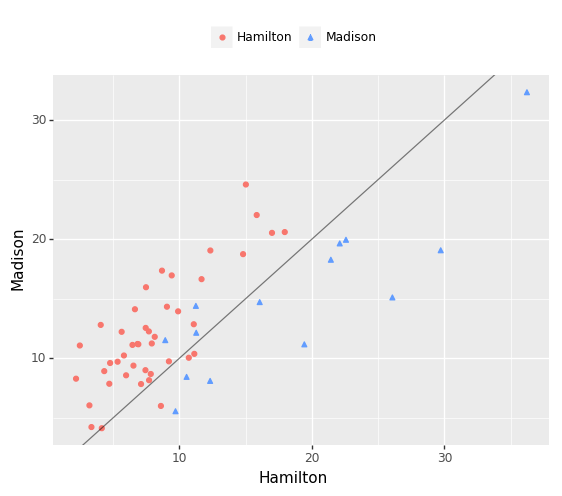

<ggplot: (306836046)>


/usr/local/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


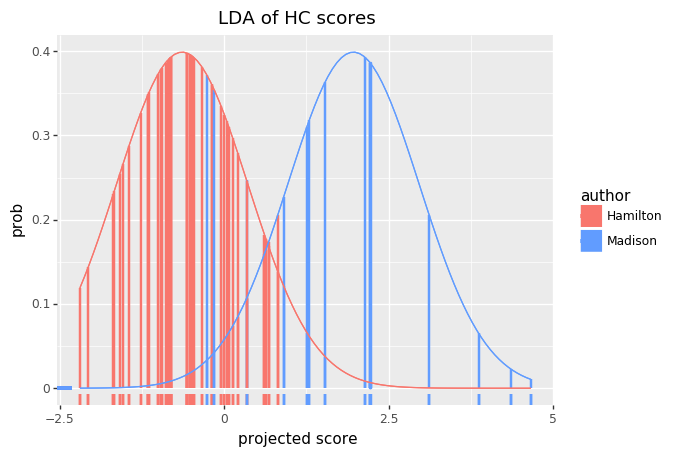

<ggplot: (306811645)>


In [19]:
# show separation 
p = plot_author_pair(df, value = 'HC')
print(p)

p = plot_LDA(df, value = 'HC', wrt_authors=('Hamilton','Madison'))
print( p + ggtitle('LDA of HC scores'))

<H2>Evaluate Scores of Disputed Papers</H2>

In [ ]:
#\\\\\\\ Authiorship of disputed papers:
data_disputed = fed_papers[fed_papers.author == 'disputed']
df_disputed = model.stats_list(data_disputed)

# show separation 
p = plot_author_pair(pd.concat([df, df_disputed]), value = 'HC', wrt_authors=['Hamilton','Madison'])
print(p + ggtitle("HC scored wrt to each corpus"))


p = plot_LDA(pd.concat([df, df_disputed]), value = 'HC',
             wrt_authors=['Hamilton','Madison']
            )
print(p + ggtitle("LDA of scores"))


<H2>Discriminiating Words</H2>

In [20]:
# word discriminating between the two corpora:
df1 = model.two_author_test('Hamilton','Madison',stbl=False)

In [ ]:
df_discriminating = df1[~np.isnan(df1.z)]

for i in [0,1,2] :
    k = 25
    p = plot_col(df_discriminating.rename(columns={'feat' : 'term'})[i*k:k*(i+1)],
                 value='pval',sign='z',wrt_authors=('Hamilton','Madison'))
    print(p)